In [1]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random

GPU, CPU 연산 구분

In [2]:
USE_CUDA = torch.cuda.is_available()
device = torch.device("cuda" if USE_CUDA else "cpu")
print("다음 기기로 학습합니다: ", device)

다음 기기로 학습합니다:  cuda


In [3]:
random.seed(777)
torch.manual_seed(777)
if device=='cuda':
  torch.cuda.manual_seed_all(777)

In [4]:
training_epochs = 15
batch_size = 100

In [5]:
mnist_train = dsets.MNIST(root='MNIST_data/', train=True, transform=transforms.ToTensor(), download=True)
mnist_test = dsets.MNIST(root='MNIST_data/', train=False, transform=transforms.ToTensor(), download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 146700697.74it/s]

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 39794905.99it/s]


Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 110003044.32it/s]

Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw




100%|██████████| 4542/4542 [00:00<00:00, 19127036.92it/s]


Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



In [6]:
data_loader = DataLoader(dataset=mnist_train, batch_size=batch_size, shuffle=True, drop_last= True)

In [7]:
model = nn.Linear(784, 10, bias=True).to(device)
#cost함수
cost_f = nn.CrossEntropyLoss().to(device) #torch.nn.functional.cross_entropy()와 동일
#optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [15]:
for e in range(training_epochs):
  avg_cost = 0
  total_batch = len(data_loader)
  for X,Y in data_loader:
    X = X.view(-1, 28*28).to(device) #X는 100x28^2. 하나의 mini batch
    Y = Y.to(device) #label

    optimizer.zero_grad
    hypothesis = model(X)
    cost = cost_f(hypothesis, Y)
    optimizer.step()

    avg_cost +=cost / total_batch
  if(e%100 == 0):
    print('Epoch:', '%04d' % (e + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 2.290925026
Learning finished


Accuracy: 0.10049999505281448
Label:  2
Prediction:  5


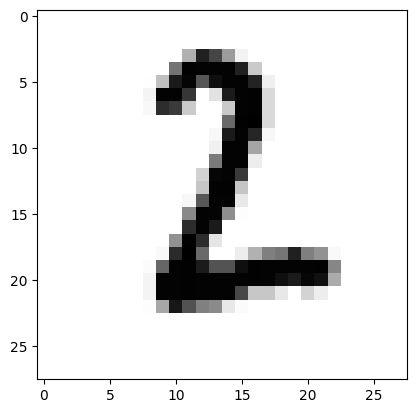

In [18]:
with torch.no_grad(): # torch.no_grad()를 하면 gradient 계산을 수행하지 않는다.
    X_test = mnist_test.data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.targets.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # MNIST 테스트 데이터에서 무작위로 하나를 뽑아서 예측을 해본다
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = model(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()